In [1]:
import pandas as pd
import pickle
import numpy as np
import random
from skimage.feature import hog

import cv2

In [2]:
## 이미지 로드를 위한 함수들
from os import listdir
from os.path import isfile, join

## 지정된 폴더 내부의 모든 이미지 파일의 Path를 읽어오는 함수
def get_sample_datalist(path = './dataset sample'):
    print('Getting sample data list..')
    imagefile_path_list = [f for f in listdir(path) if isfile(join(path, f))]
    print(imagefile_path_list)
    return imagefile_path_list

## 입력된 모든 Path에 대응되는 이미지를 읽어오는 함수
def load_my_data(imagefile_path_list, test=None):
    print('load_my_data')
    x = []
    for path in imagefile_path_list:
        img = cv2.imread('./dataset sample/' + path)

        #이미지는 256x256으로 모두 리사이즈
        if img.shape[:2] != (256,256):
            img = cv2.resize(img, (256,256))
        x.append(img)
        
    return x

In [3]:
## Color Histogram을 추출하는 함수 - 자세한 내용은 Coding Lab 수업 참고
def get_color_histogram(x):

  hist_feature = []

  for i in range(len(x)):

    curr_img_hsv = cv2.cvtColor(x[i], cv2.COLOR_BGR2HSV)
    
    curr_hist = cv2.calcHist([curr_img_hsv], [0], None, [20], [0, 180])

    curr_hist = curr_hist.squeeze().astype(np.float64)

    hist_feature.append(curr_hist/np.sum(curr_hist))

  return hist_feature

In [4]:
## HOG Feature를 추출하는 함수 - 자세한 내용은 Coding Lab 수업 참고
def get_hog_feature(x):

  hog_feature = []

  for i in range(len(x)):

    curr_img_hsv = cv2.cvtColor(x[i], cv2.COLOR_BGR2HSV)

    _, curr_hog = hog(curr_img_hsv[:,:,2], orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=False)  
    
    curr_hog = np.reshape(curr_hog, [-1])

    hog_feature.append(curr_hog)

  return hog_feature 

In [5]:
## 본 프로그램 시작
# 현재 위치의 모든 이미지 파일을 Query Image로 읽어오기
x_pathlist = get_sample_datalist('./dataset sample')
x = load_my_data(x_pathlist)

# Color histogram 추출 (Query)
color_hist = get_color_histogram(x)

# HOG feature 추출 (Query)
hog_feature = get_hog_feature(x)

Getting sample data list..
['ball1.jpg', 'ball2.jpg', 'ball3.jpg', 'lt1.jpg', 'lt2.jpg', 'lt3.jpg', 'sin1.jpg', 'sin2.jpg', 'sin3.jpg']
load_my_data


c:\Users\cau\anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  # This is added back by InteractiveShellApp.init_path()


load_my_data


Text(0.5, 1.0, 'Target Image')

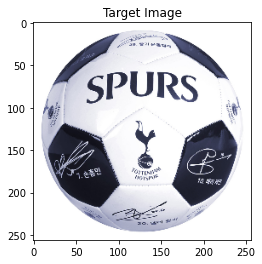

In [6]:
from matplotlib import pyplot as plt

# 유사도를 측정할 타겟 이미지 로드, 출력
# Target Image Loading...
target_image_path = ['ball1.jpg']
img_target = load_my_data(target_image_path)

# Target Image Showing...
plt.imshow(img_target[0][:,:,::-1])
plt.title('Target Image')

[0.         0.66853931 0.21208507 0.26415364 0.23309515 0.49562776
 0.26953867 0.19524939 0.15203269]
[0 8 7 2 4 3 6 5 1]
load_my_data


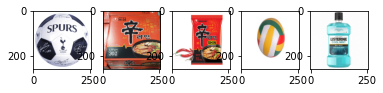

In [7]:
# Target Image Matching...(color histogram)
color_hist_target = get_color_histogram(img_target)[0]

### BLANK ### 아래 코드의 빈칸을 풀어보세요
distance = np.sum((color_hist_target - color_hist) ** 2, 1) # 히스토그램 백터간의 거리를 계산하여 유사도 측정
#distance = [np.sum(np.square(i - color_hist_target)) for i in color_hist]

### BLANK ### 아래 코드의 빈칸을 풀어보세요
idx = np.argsort(distance) # 유사한 것들 순으로 정렬하여 인덱스 추출

print(distance)
print(idx)

# Retrieval result showing...
NUM_CANDIDATE = 5
query_images = load_my_data(x_pathlist)
for i in range(NUM_CANDIDATE):
  plt.subplot(1,NUM_CANDIDATE,i+1)
  plt.imshow(query_images[idx[i]][:,:,::-1])
  
# 히스토그램으로 확인시 색이 비슷한 것들 끼리 추출됨
# 히스토그램 사용시 신라면에 검은색이 많기때문에 공과 유사하다고 판별됨

c:\Users\cau\anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  # This is added back by InteractiveShellApp.init_path()


[0.0, 3852426.213967274, 3973585.986426579, 6171477.419002576, 4589803.478118859, 5353879.728089123, 6813092.720008407, 5659451.026169447, 6509356.426757244]
[0 1 2 4 5 7 3 8 6]
load_my_data


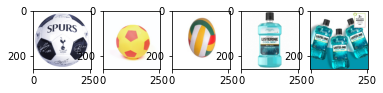

In [8]:
# Target Image Matching...(HOG feature...)
hog_feature_target = get_hog_feature(img_target)[0]

### BLANK ### 아래 코드의 빈칸을 풀어보세요
distance_hog = distance_hog = [np.sum(np.square(i - hog_feature_target)) for i in hog_feature]
# HOG 백터간의 거리를 계산하여 유사도 측정

### BLANK ### 아래 코드의 빈칸을 풀어보세요
idx_hog = np.argsort(distance_hog) # 유사한 것들 순으로 정렬하여 인덱스 추출

print(distance_hog)
print(idx_hog)

# Retrieval result showing...
NUM_CANDIDATE = 5
query_images = load_my_data(x_pathlist)
for i in range(NUM_CANDIDATE):
  plt.subplot(1,NUM_CANDIDATE,i+1)
  plt.imshow(query_images[idx_hog[i]][:,:,::-1])
  
# 히스토그램과는 다르게 HOG 특징 등을 확인하여 비슷한 것들 끼리 추출됨

load_my_data


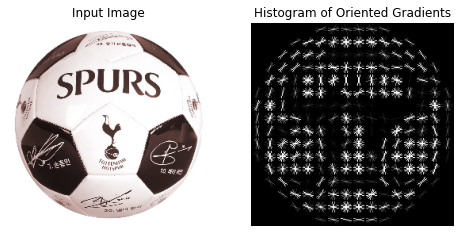

In [9]:
from cmath import pi
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

target_image_path = ['ball1.jpg']
img_target = load_my_data(target_image_path)

image = img_target[0]

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1),  visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input Image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()